In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Activation Function
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [3]:
# Derivative of the activation function for backpropogation
def sigmoid_derivative(x):
    return x * (1 - x)

In [15]:
# Input for XOR gate and Expected Output
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])

In [16]:
# 2 input neuron, 2 hidden neuron and 1 output neuron
input_layer_neurons = 2
hidden_layer_neurons = 2
output_layer_neurons = 1

In [17]:
# Weights and Biases
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_layer_neurons))

In [18]:
weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

(array([[0.54286836, 0.73908954],
        [0.60540654, 0.64497066]]),
 array([[0.47377344],
        [0.59507074]]),
 array([[0.76146436, 0.90828199]]),
 array([[0.36007229]]))

In [19]:
learning_rate = 0.1
epochs = 100000

In [20]:
loss = []
for i in range(epochs):
    # Forward Propogation / Feed Forward
    hidden_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Calculating Error = difference between predicted and actual
    error = outputs - final_output

    # Backpropogation
    # Calculate the derivative of error w.r.t. output
    d_output = error * sigmoid_derivative(final_output)

    # Calculate the error for hidden layer 
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Updating weights and biases using Gradient Descent
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    weights_input_hidden += inputs.T.dot(d_hidden) * learning_rate

    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # loss record
    if epochs % 100 ==0:
        loss.append(np.mean(np.abs(error)))

In [21]:
for i, inp in enumerate(inputs):
    hidden_input = np.dot(inp, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    print(f"Input: {inp}, Predicted Output: {np.round(final_output)[0]}")

Input: [0 0], Predicted Output: [0.]
Input: [0 1], Predicted Output: [1.]
Input: [1 0], Predicted Output: [1.]
Input: [1 1], Predicted Output: [0.]


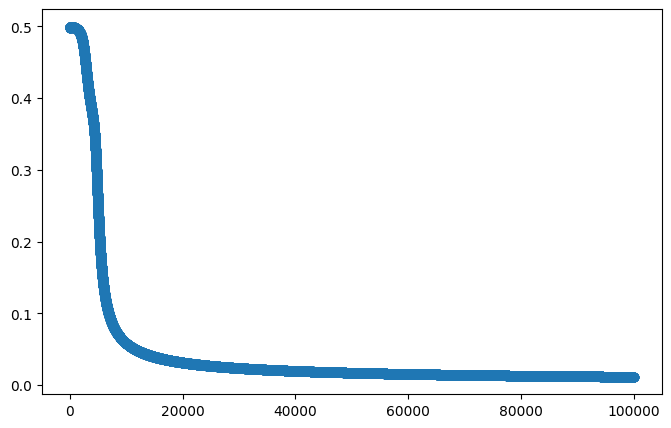

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(range(100000), loss)
plt.show()

In [12]:
final_output

array([[0.9883901]])